<a href="https://colab.research.google.com/github/guimaraess2/Machine-Learning-Customer-Segmentation/blob/master/Direct_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pwd

/content


In [2]:
cd sample_data/

/content/sample_data


**Importando as bibliotecas / Importing the libraries**

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import warnings
from mpl_toolkits.mplot3d import Axes3D
import plotly as py
import plotly.graph_objs as go
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected=True)
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Carregando o dataset / Loading the dataset**

In [4]:
df = pd.read_csv('DirectMarketing.csv')

**Informações estatísticas / Statistical information**

In [5]:
df.describe()

,CustomerID,Income,Salary,Children,ScorePunctuation,Age,Catalogs,AmountSpent
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,60.560000,57396.500000,0.890000,50.200000,38.850000,14.880000,1346.110000
std,57.879185,26.264721,31896.335508,1.092643,25.823522,13.969007,6.804196,1078.552481
min,1.000000,15.000000,10200.000000,0.000000,1.000000,18.000000,6.000000,38.000000
25%,50.750000,41.500000,30025.000000,0.000000,34.750000,28.750000,6.000000,497.250000
50%,100.500000,61.500000,54850.000000,0.000000,50.000000,36.000000,12.000000,994.500000
75%,150.250000,78.000000,80825.000000,2.000000,73.000000,49.000000,19.500000,1967.000000
max,200.000000,137.000000,140000.000000,3.000000,99.000000,70.000000,24.000000,5564.000000


**Visualização de dados / Data visualization**

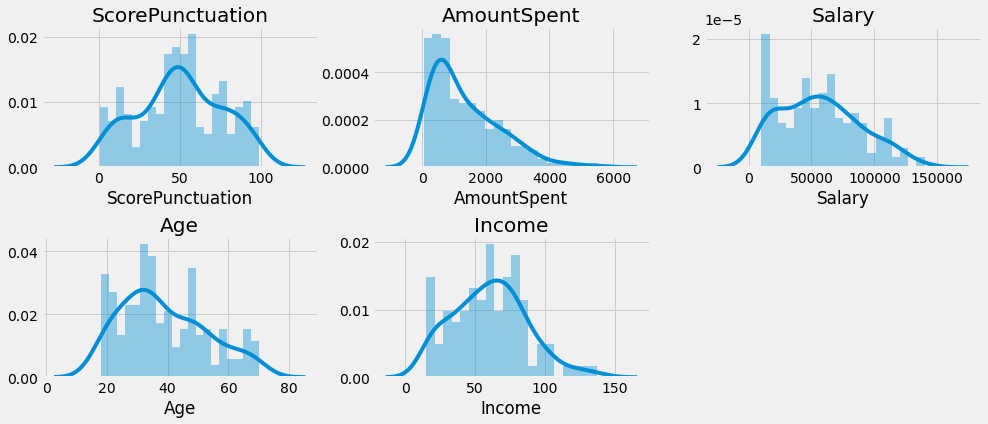

In [6]:
plt.style.use('fivethirtyeight')
plt.figure(1, figsize=(15,6))
n=0
for x in ['ScorePunctuation','AmountSpent','Salary','Age','Income']:
    n+=1
    plt.subplot(2,3,n)
    plt.subplots_adjust(hspace=0.5)
    sns.distplot(df[x], bins=20)
    plt.title('{}'.format(x))
plt.show()
        

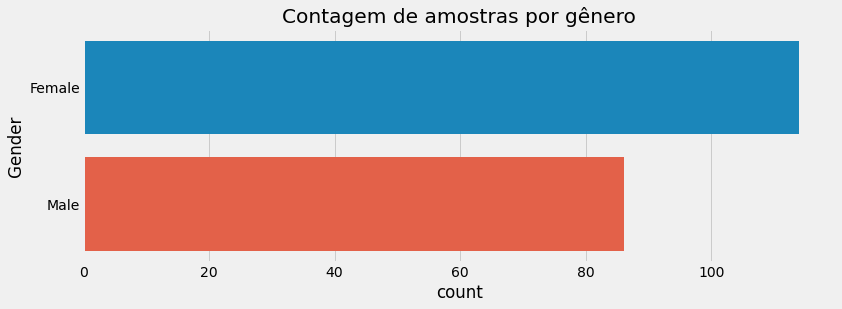

In [7]:
plt.figure(1, figsize=(12,4))
sns.countplot(y='Gender', data=df)
plt.title('Contagem de amostras por gênero')
plt.show()

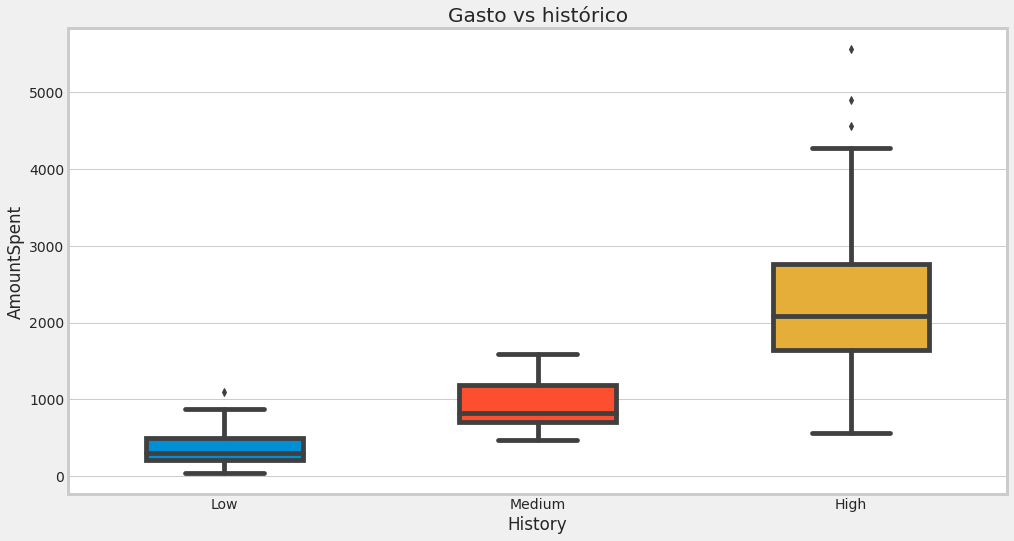

In [8]:
plt.figure(1, figsize=(15,8))
sns.set_style("whitegrid") 
sns.boxplot( x=df["History"], y=df["AmountSpent"], width=0.5, saturation=1.2, linewidth=4.8, order=["Low","Medium","High"]);
plt.title('Gasto vs histórico')
plt.show()

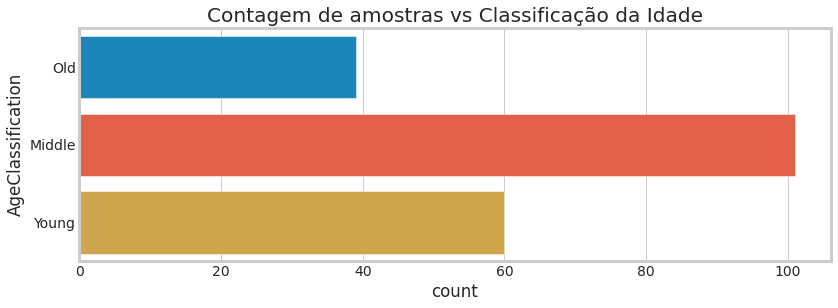

In [9]:
plt.figure(1, figsize=(12,4))
sns.countplot(y='AgeClassification', data=df)
plt.title('Contagem de amostras vs Classificação da Idade')
plt.show()

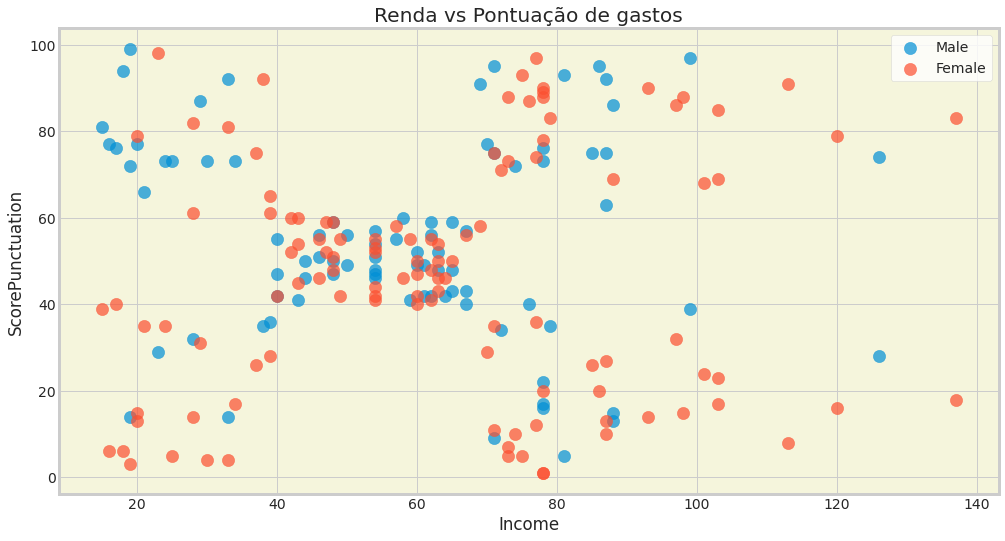

In [32]:
plt.figure(1, figsize=(15,8))
ax = plt.gca()
ax.set_facecolor('beige')
plt.figure(1, figsize=(20,10))
for gender in ['Male','Female']:
    plt.scatter(x='Income', y='ScorePunctuation', data=df[df['Gender']==gender], alpha=0.7, label=gender, s=150)
plt.xlabel('Income'), plt.ylabel('ScorePunctuation')
plt.title('Renda vs Pontuação de gastos')
plt.legend()
plt.show()

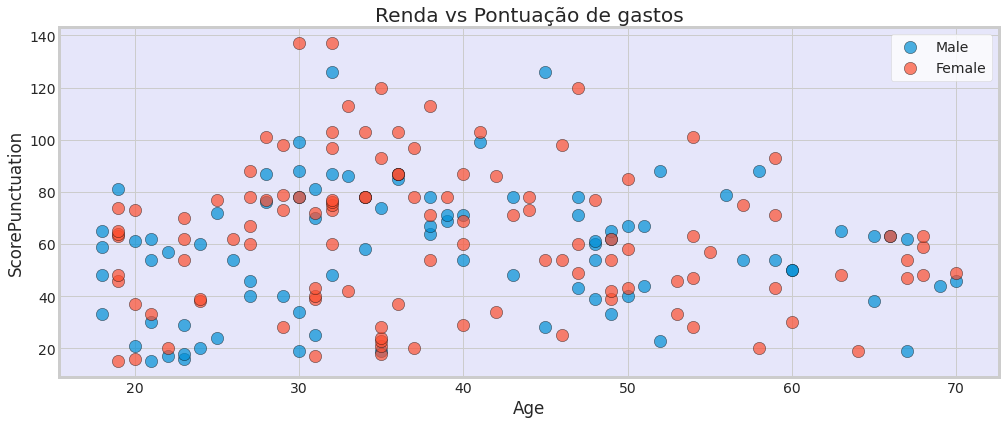

In [33]:
plt.figure(1, figsize=(15,6))
ax = plt.gca()
ax.set_facecolor('lavender')
for gender in ['Male','Female']:
    plt.scatter(x='Age', y='Income', data=df[df['Gender']==gender], alpha=0.7, label=gender, s=150, edgecolor='black')
plt.xlabel('Age'), plt.ylabel('ScorePunctuation')
plt.title('Renda vs Pontuação de gastos')
plt.legend()
plt.show()

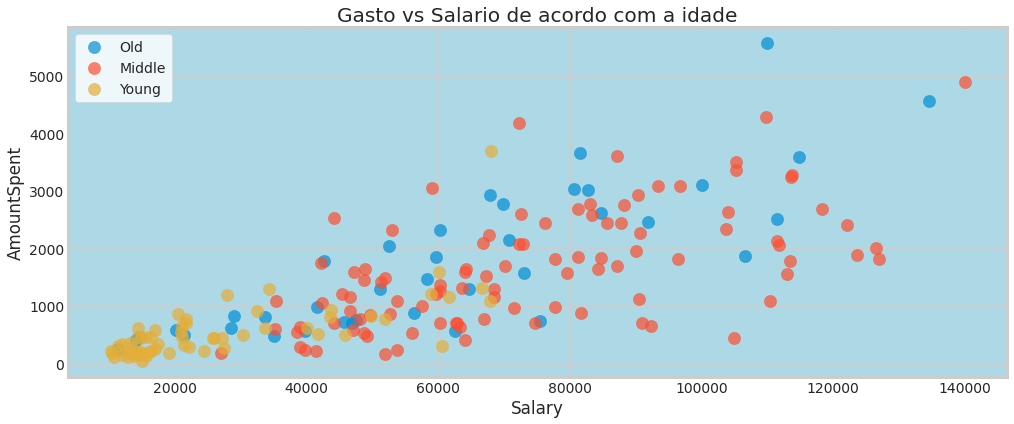

In [35]:
plt.figure(1, figsize=(15,6))
ax = plt.gca()
ax.set_facecolor('lightblue')
for age in ['Old','Middle','Young']:
    plt.scatter(x='Salary', y='AmountSpent', data=df[df['AgeClassification']==age], alpha=0.7, label=age, s=150)
plt.xlabel('Salary'), plt.ylabel('AmountSpent')
plt.title('Gasto vs Salario de acordo com a idade')
plt.legend()
plt.show()

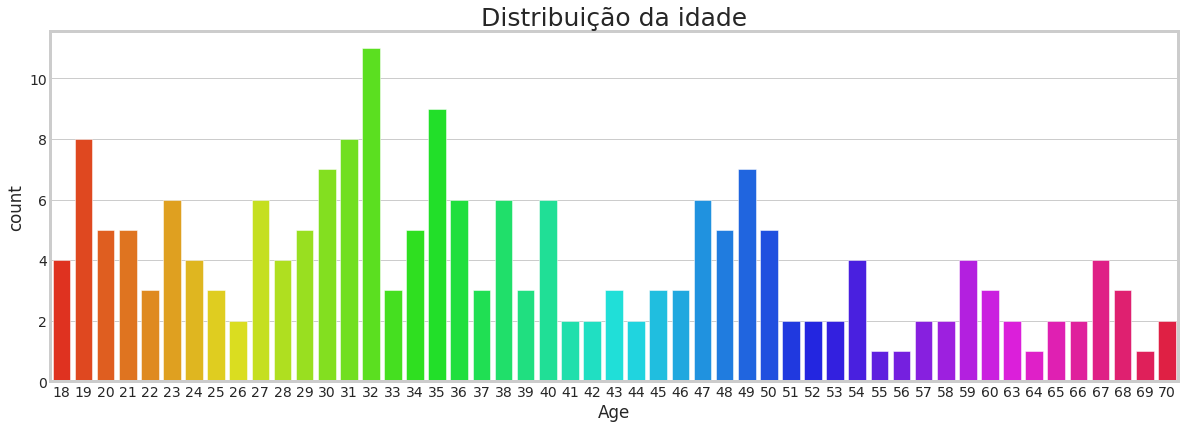

In [46]:
plt.rcParams['figure.figsize'] = (18,6)
sns.countplot(df['Age'], palette='hsv')
plt.title('Distribuição da idade', fontsize=25)
plt.show()

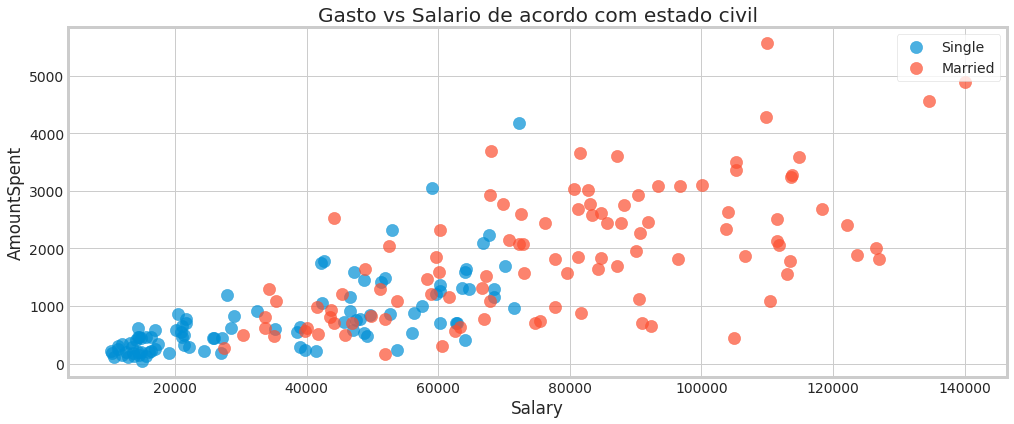

In [13]:
plt.figure(1, figsize=(15,6))
for married in ['Single','Married']:
    plt.scatter(x='Salary', y='AmountSpent', data=df[df['Married']==married], alpha=0.7, label=married, s=150)
plt.xlabel('Salary'), plt.ylabel('AmountSpent')
plt.title('Gasto vs Salario de acordo com estado civil')
plt.legend()
plt.show()

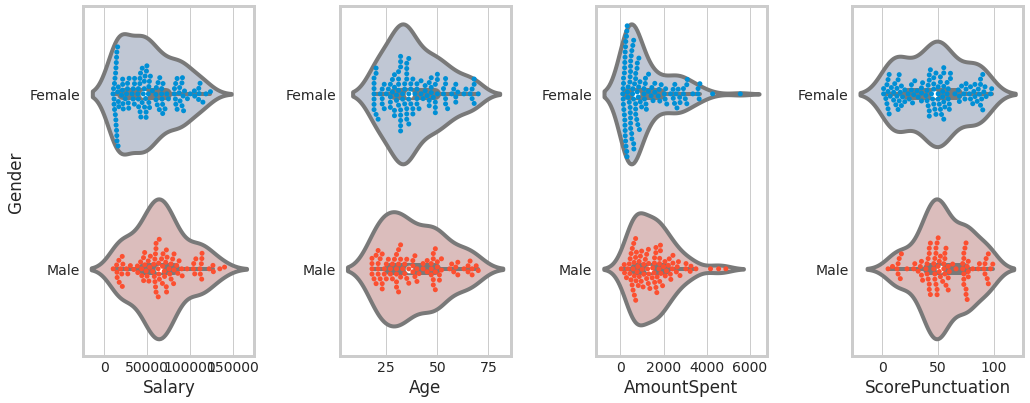

In [14]:
plt.figure(1, figsize=(15,6))
n=0
for cols in['Salary','Age','AmountSpent','ScorePunctuation']:
    n+=1
    plt.subplot(1,4,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=cols, y= 'Gender', data=df, palette='vlag')
    sns.swarmplot(x=cols, y= 'Gender', data=df)
    plt.ylabel('Gender' if n==1 else '')
plt.show()

**Usando o método cotovelo para encontrar o número ideal de clusters /**
**Using the elbow method to find the optimal number of clusters** 

In [15]:
X=df[['Income','ScorePunctuation']].iloc[:,:].values
inertia=[]
for n in range(1,11):
    Kmeans=(KMeans(n_clusters=n))
    Kmeans.fit(X)
    inertia.append(Kmeans.inertia_)

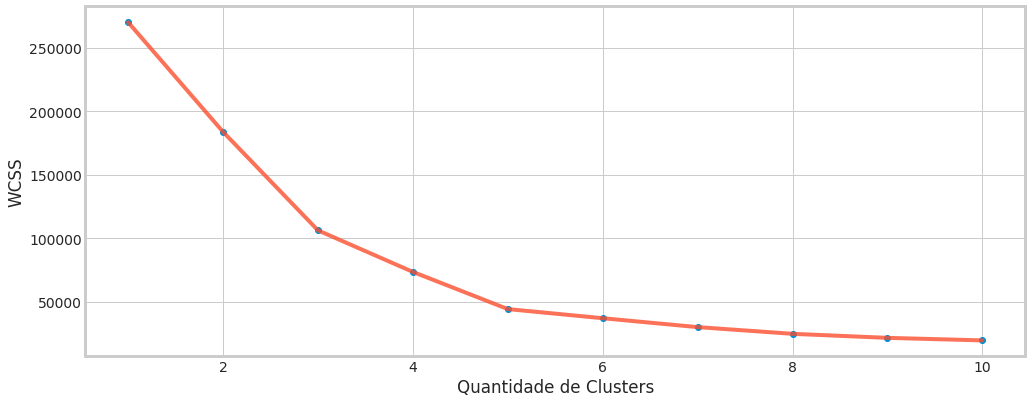

In [16]:
plt.figure(1, figsize=(15,6))
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-', alpha=0.8)
plt.xlabel('Quantidade de Clusters'), plt.ylabel('WCSS')
plt.show()

**Análise do algoritmo / Algorithm analysis visualization**

In [36]:
kmeans = KMeans(n_clusters = 4, random_state = 0)
previsoes = kmeans.fit_predict(X)

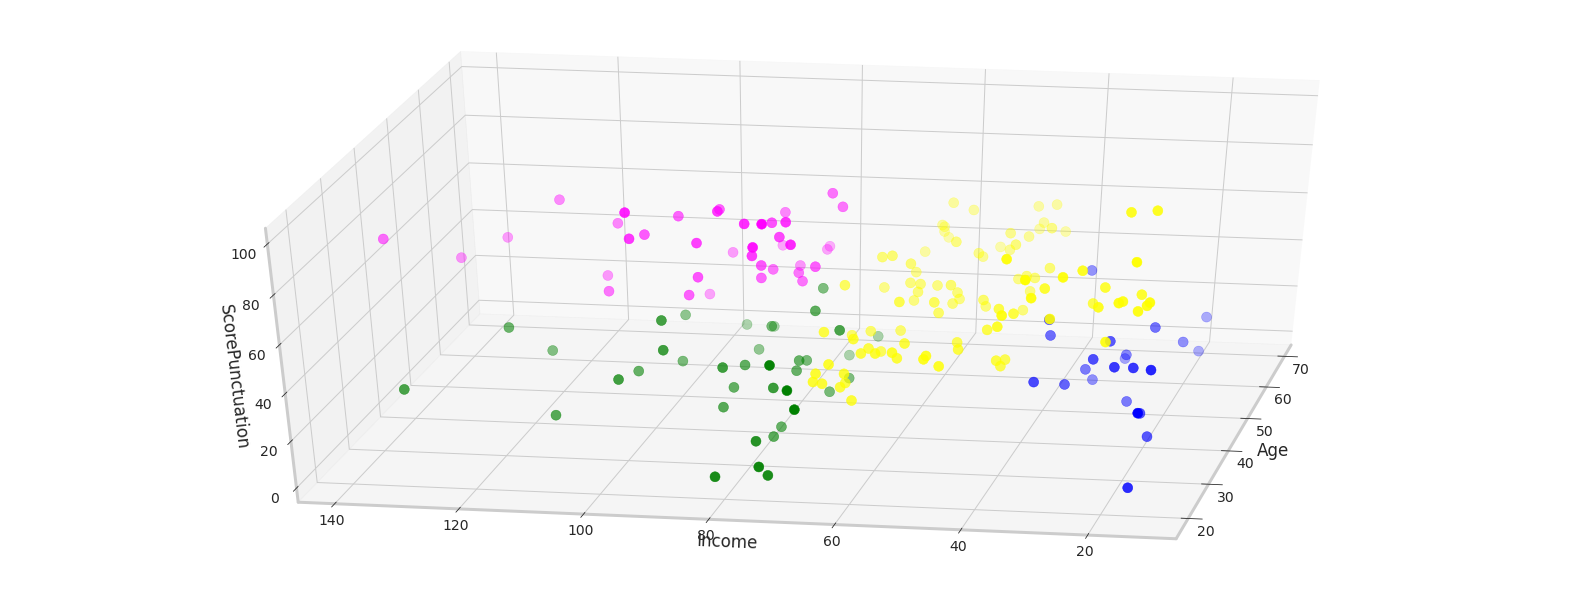

In [37]:
df["label"] = previsoes
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Income"][df.label == 0], df["ScorePunctuation"][df.label == 0], c='green', s=100)
ax.scatter(df.Age[df.label == 1], df["Income"][df.label == 1], df["ScorePunctuation"][df.label == 1], c='magenta', s=100)
ax.scatter(df.Age[df.label == 2], df["Income"][df.label == 2], df["ScorePunctuation"][df.label == 2], c='blue', s=100)
ax.scatter(df.Age[df.label == 3], df["Income"][df.label == 3], df["ScorePunctuation"][df.label == 3], c='yellow', s=100)
ax.view_init(35, 190)
plt.xlabel("Age")
plt.ylabel("Income")
ax.set_zlabel('ScorePunctuation')
plt.show()

**Analise da segmentação dos dados / Analysis of data segmentation**

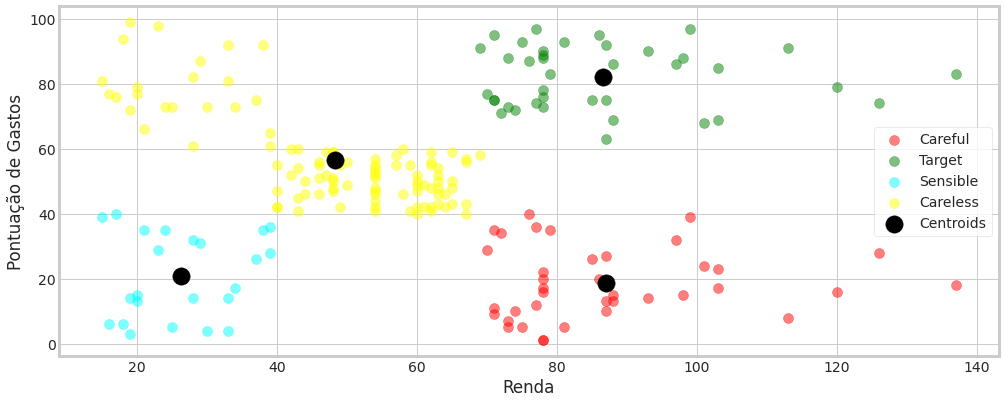

In [40]:
plt.figure(1, figsize=(15,6))
plt.scatter(X[previsoes==0,0], X[previsoes==0,1], s=100, c='red', alpha=0.5, label='Careful')
plt.scatter(X[previsoes==1,0], X[previsoes==1,1], s=100, c='green', alpha=0.5, label='Target')
plt.scatter(X[previsoes==2,0], X[previsoes==2,1], s=100, c='cyan', alpha=0.5, label='Sensible')
plt.scatter(X[previsoes==3,0], X[previsoes==3,1], s=100, c='yellow', alpha=0.5, label='Careless')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')  
plt.xlabel('Renda')
plt.ylabel('Pontuação de Gastos')
plt.legend()
plt.show()